# LAB 2: Clustering

In [51]:
import numpy as np
import pandas as pd
import random
from scipy.cluster.hierarchy import dendrogram

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
# Simulate data for clusters
random.seed(2)

np.random.seed(2)
x = np.random.rand(50,2)
x[0:24,0] = x[0:24,0] + 3
x[0:24,1] = x[0:24,1] - 4
print(x)
print(np.shape(x))

[[ 3.4359949  -3.97407377]
 [ 3.54966248 -3.56467761]
 [ 3.4203678  -3.66966518]
 [ 3.20464863 -3.38072903]
 [ 3.29965467 -3.73317272]
 [ 3.62113383 -3.47085791]
 [ 3.13457995 -3.48642188]
 [ 3.18443987 -3.21466485]
 [ 3.85397529 -3.50576316]
 [ 3.84656149 -3.92035452]
 [ 3.50524609 -3.9347135 ]
 [ 3.42812233 -3.90346908]
 [ 3.12715997 -3.40325469]
 [ 3.226012   -3.89305432]
 [ 3.22030621 -3.65017371]
 [ 3.46778748 -3.79825677]
 [ 3.64040673 -3.51693016]
 [ 3.50523672 -3.61310735]
 [ 3.79363745 -3.41999582]
 [ 3.1622986  -3.29924765]
 [ 3.96455108 -3.49999164]
 [ 3.88952006 -3.65838635]
 [ 3.56714413 -3.57245404]
 [ 3.43674726 -3.22344082]
 [ 0.53560417  0.95374223]
 [ 0.54420816  0.08209492]
 [ 0.3663424   0.8508505 ]
 [ 0.40627504  0.02720237]
 [ 0.24717724  0.06714437]
 [ 0.99385201  0.97058031]
 [ 0.80025835  0.60181712]
 [ 0.76495986  0.16922545]
 [ 0.29302323  0.52406688]
 [ 0.35662428  0.04567897]
 [ 0.98315345  0.44135492]
 [ 0.50400044  0.32354132]
 [ 0.25974475  0.38688989]
 

In [3]:
# Perform K-means clustering with K = 2 
kmeans = KMeans(n_clusters=2, n_init=20)
kmeans.fit(x)
kmeans_labels = kmeans.labels_
centers = kmeans.cluster_centers_
print('cluster labels: \n' + str(kmeans.labels_) + '\n')
print('cluster centroids: \n' + str(kmeans.cluster_centers_))

cluster labels: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]

cluster centroids: 
[[ 0.54654662  0.4082413 ]
 [ 3.47854979 -3.59611902]]


Cluster centroids display the mean for each centroid (rows) in each feature (columns)

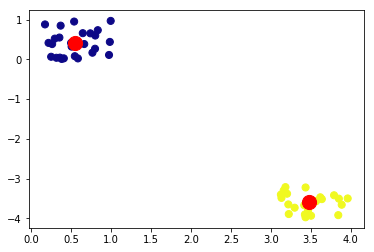

In [4]:
# Plot results
plt.scatter(x[:, 0], x[:, 1], c=kmeans_labels, s=50, cmap='plasma')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1);

cluster labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 2 2 1 1 1 2 1 1
 2 1 1 1 1 1 1 1 1 2 1 2 2]

cluster centroids: 
[[ 3.47854979 -3.59611902]
 [ 0.47919212  0.22697269]
 [ 0.67377179  0.75063757]]


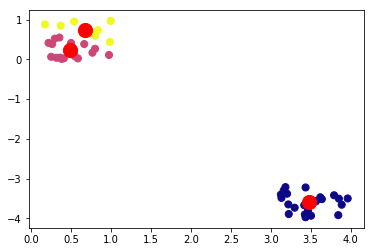

In [5]:
# Repeat with n-clusters 3
random.seed(4)

kmeans = KMeans(n_clusters=3, n_init=20)
kmeans.fit(x)
kmeans_labels = kmeans.labels_
centers = kmeans.cluster_centers_
print('cluster labels: \n' + str(kmeans.labels_) + '\n')
print('cluster centroids: \n' + str(kmeans.cluster_centers_))

# Plot results
plt.scatter(x[:, 0], x[:, 1], c=kmeans_labels, s=50, cmap='plasma')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1);

In [6]:
# Compare performance with n_init of 1 and n_init of 20
random.seed(3)
kmeans = KMeans(n_clusters=3, n_init=1)
kmeans.fit(x)
print('within cluster sum of squares for n_init=1: ' + str(kmeans.inertia_))

kmeans = KMeans(n_clusters=3, n_init=20)
kmeans.fit(x)
print('within cluster sum of squares for n_init=20: ' + str(kmeans.inertia_))

within cluster sum of squares for n_init=1: 5.538628135623786
within cluster sum of squares for n_init=20: 4.878211086918383


In [7]:
# Compute hierarchical clustering with different linkages

hc_complete = AgglomerativeClustering(linkage='complete')
hc_average = AgglomerativeClustering(linkage='average')
hc_single = AgglomerativeClustering(linkage='single')
hc_complete.fit(x)
hc_average.fit(x)
hc_single.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=2,
            pooling_func='deprecated')

In [50]:
print(hc_complete.labels_)
print(hc_average.labels_)
print(hc_single.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


Text(0.5,1,'hc single')

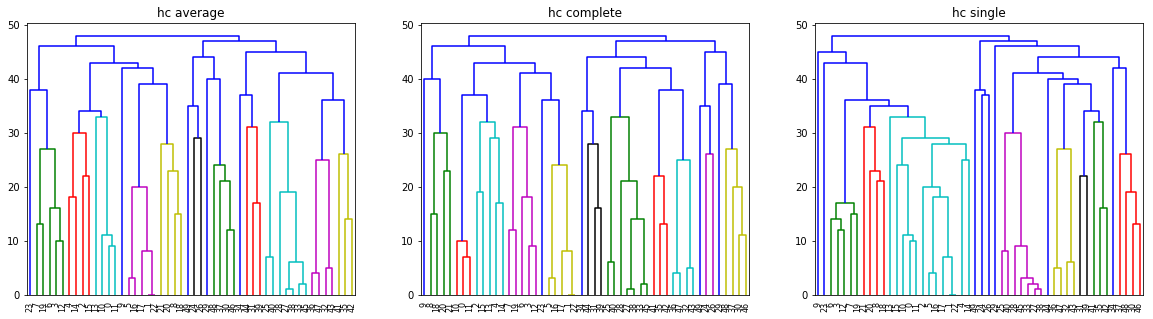

In [59]:
# plot dendogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
#plot_dendrogram(hc_complete)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 5))

plot_dendrogram(hc_average, ax=ax1)
ax1.set_title('hc average')
plot_dendrogram(hc_complete, ax=ax2)
ax2.set_title('hc complete')
plot_dendrogram(hc_single, ax=ax3)
ax3.set_title('hc single')

In [70]:
print(hc_complete.children_)

[[ 1 22]
 [27 38]
 [33 45]
 [ 5 16]
 [36 47]
 [32 43]
 [25 40]
 [ 0 11]
 [17 50]
 [ 3 12]
 [10 57]
 [30 46]
 [ 7 19]
 [35 42]
 [51 52]
 [ 8 18]
 [31 39]
 [ 4 14]
 [ 6 59]
 [ 2 15]
 [37 61]
 [28 64]
 [41 63]
 [20 21]
 [53 58]
 [54 55]
 [24 26]
 [48 70]
 [44 66]
 [13 67]
 [65 73]
 [62 68]
 [69 79]
 [56 71]
 [34 78]
 [49 76]
 [23 74]
 [60 82]
 [72 75]
 [29 77]
 [ 9 80]
 [81 86]
 [83 88]
 [87 91]
 [84 92]
 [85 89]
 [90 93]
 [94 95]
 [96 97]]


In [78]:
# print linkage using scipy

from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

z = sc(x, 'complete')
print(z)

[[1.00000000e+00 2.20000000e+01 1.91332415e-02 2.00000000e+00]
 [2.70000000e+01 3.80000000e+01 3.05565201e-02 2.00000000e+00]
 [3.30000000e+01 4.50000000e+01 4.35390934e-02 2.00000000e+00]
 [5.00000000e+00 1.60000000e+01 4.99409392e-02 2.00000000e+00]
 [3.60000000e+01 4.70000000e+01 5.40985616e-02 2.00000000e+00]
 [3.20000000e+01 4.30000000e+01 6.38018189e-02 2.00000000e+00]
 [2.50000000e+01 4.00000000e+01 6.83935695e-02 2.00000000e+00]
 [0.00000000e+00 1.10000000e+01 7.10422326e-02 2.00000000e+00]
 [1.70000000e+01 5.00000000e+01 7.40622637e-02 3.00000000e+00]
 [3.00000000e+00 1.20000000e+01 8.06963322e-02 2.00000000e+00]
 [1.00000000e+01 5.70000000e+01 8.32123067e-02 3.00000000e+00]
 [3.00000000e+01 4.60000000e+01 8.32373002e-02 2.00000000e+00]
 [7.00000000e+00 1.90000000e+01 8.74327511e-02 2.00000000e+00]
 [3.50000000e+01 4.20000000e+01 9.16267092e-02 2.00000000e+00]
 [5.10000000e+01 5.20000000e+01 9.41546391e-02 4.00000000e+00]
 [8.00000000e+00 1.80000000e+01 1.04865111e-01 2.000000

- First and second column indicate indexes to merge.
- Third column indicates de distance between the indexes
- Forth column indicates the number of samples in the cluster
- If idx excedes the dimensions of x, then is indexing the iteration number of the cluster to be added

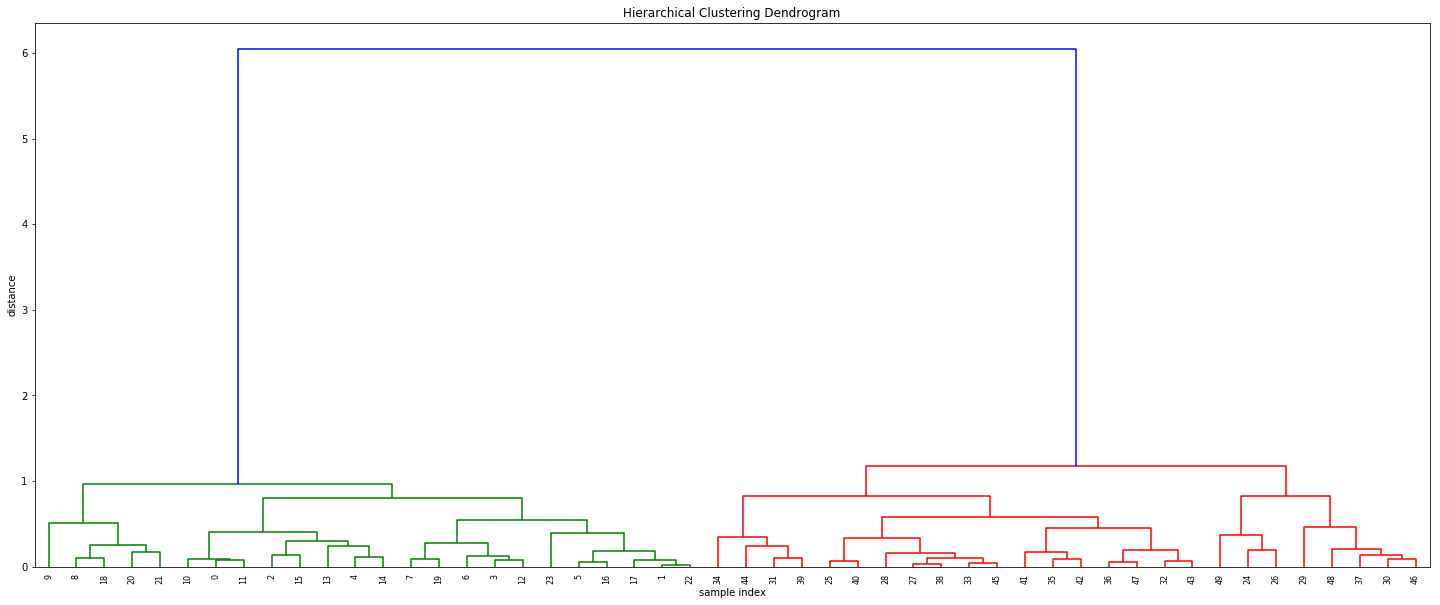

In [76]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [87]:
cutree = cut_tree(z, height=[10])
print(cutree)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


Helpful resources:

- [tutorial using scipy for hc](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)
- [scikit learn AgglomerativeCluster documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
- [scipy documentation](https://docs.scipy.org/doc/scipy-0.18.1/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy)
- [function for plotting dedrogram with sci-kit learn data](https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py)
